In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [3]:
df = pd.read_csv("../data/raw/BrentOilPrices.csv")
# Automatically parse dates with dayfirst enabled
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
# Drop rows with invalid date entries (if any)
df = df.dropna(subset=['Date'])

# Sort the data by date
df = df.sort_values('Date').reset_index(drop=True)

C:\Users\የአብትዕግስት\AppData\Local\Temp\ipykernel_10836\4234840484.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


# Compute log returns

In [4]:
df['Log_Return'] = np.log(df['Price']) - np.log(df['Price'].shift(1))
df.dropna(inplace=True)

# Plotting

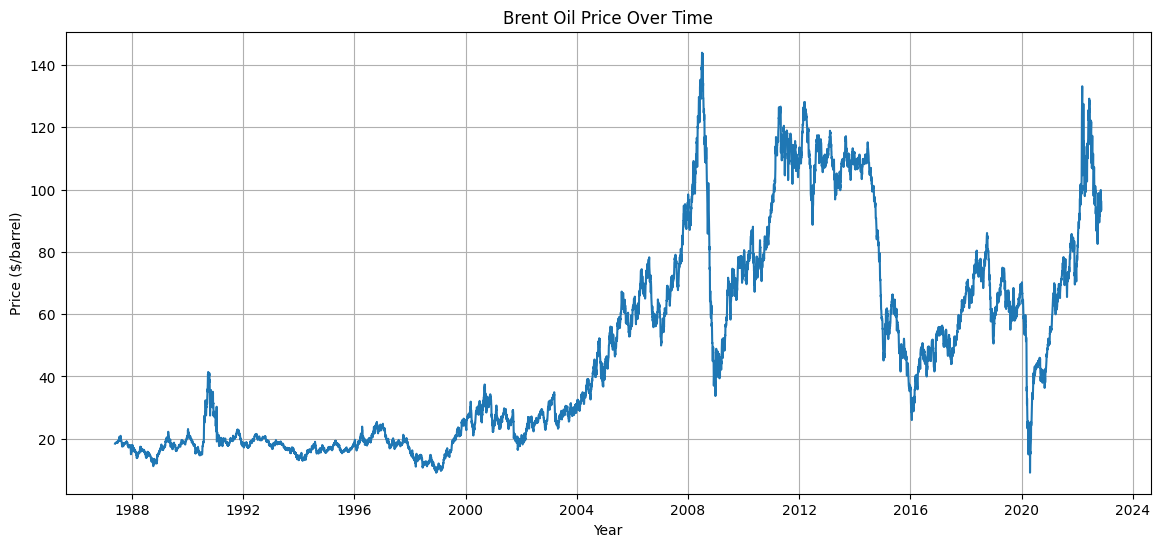

In [5]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Price'])
plt.title("Brent Oil Price Over Time")
plt.ylabel("Price ($/barrel)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

# Log returns plot

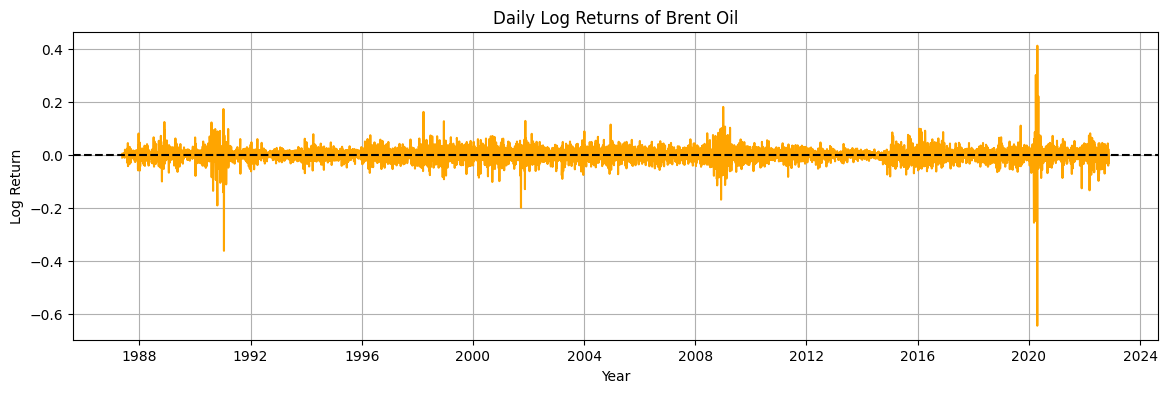

In [6]:
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['Log_Return'], color='orange')
plt.title("Daily Log Returns of Brent Oil")
plt.ylabel("Log Return")
plt.xlabel("Year")
plt.axhline(0, color='black', linestyle='--')
plt.grid(True)
plt.show()

## Observations: 

- Clear volatility clustering (e.g., 2008, 2020, 2022).
- Non-stationary price series → supports use of log returns.
- Structural breaks visible during crises.

# Build Bayesian Change Point Model (PyMC3)

In [ ]:
import pymc3 as pm
import arviz as az

ModuleNotFoundError: No module named 'arviz'